In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
mpl.rcParams['figure.figsize']=12,8
from datetime import datetime
from fbprophet import Prophet

data=pd.read_csv('PRSA_data_2010.1.1-2014.12.31.csv',encoding='utf-8')
data['date']=data['year'].map(str)+'-'+data['month'].map(str)+'-'+data['day'].map(str)+" "+data['hour'].map(str)+":00:00"
data=data.drop(columns=['year','month','day','hour','No'],axis=1)
data1=data[24:].reset_index()
data1.drop(['index'],inplace=True,axis=1)
data1.columns=['pollution','dew','temp','pressure','dir','speed','snow','rain','date']
data1.head()

,pollution,dew,temp,pressure,dir,speed,snow,rain,date
0,129.0,-16,-4.0,1020.0,SE,1.79,0,0,2010-1-2 0:00:00
1,148.0,-15,-4.0,1020.0,SE,2.68,0,0,2010-1-2 1:00:00
2,159.0,-11,-5.0,1021.0,SE,3.57,0,0,2010-1-2 2:00:00
3,181.0,-7,-5.0,1022.0,SE,5.36,1,0,2010-1-2 3:00:00
4,138.0,-7,-5.0,1022.0,SE,6.25,2,0,2010-1-2 4:00:00


In [124]:
data2=data1[['date','speed']]
data2.columns=['ds','y']
# scaler=MinMaxScaler(feature_range=(0,1))
# scaled_d=scaler.fit_transform(data2[['y']])
scaled_data=data2
# scaled_data2=pd.concat([data2['ds'],pd.DataFrame(scaled_d)],axis=1)
# scaled_data2.columns=['ds','y']
scaled_data2=scaled_data
scaled_data.head()

scaled_data2.loc['ds']=pd.to_datetime(scaled_data['ds'])
scaled_data2.set_index("ds",inplace=True)
scaled_data2=scaled_data2.dropna()
scaled_data2

D:\anaconda\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,y
ds,
2010-1-2 0:00:00,1.79
2010-1-2 1:00:00,2.68
2010-1-2 2:00:00,3.57
2010-1-2 3:00:00,5.36
2010-1-2 4:00:00,6.25
...,...
2014-12-31 19:00:00,231.97
2014-12-31 20:00:00,237.78
2014-12-31 21:00:00,242.70


In [125]:
y = scaled_data2['y']
y.index=pd.DatetimeIndex(y.index)
daily_wind = y.resample('24H').mean()
daily_wind = pd.DataFrame(daily_wind)
daily_wind.head()

,y
ds,
2010-01-02,24.860000
2010-01-03,70.937917
2010-01-04,111.160833
2010-01-05,56.920000
2010-01-06,18.511667


In [126]:
daily_wind['y']=(daily_wind['y']-daily_wind['y'].mean())/(daily_wind['y'].std())
Mean=daily_wind['y'].mean()
Std=daily_wind['y'].std()

In [127]:
def plot_origin(data,daystart,dayend):
    data=data['y'][daystart:dayend]
    plt.scatter([range(0,dayend-daystart)],data)
    plt.grid(alpha=0.5)
    plt.title('origin data',fontsize=20)
    plt.xlabel('day',fontsize=15)
    plt.ylabel('wind speed',fontsize=15)

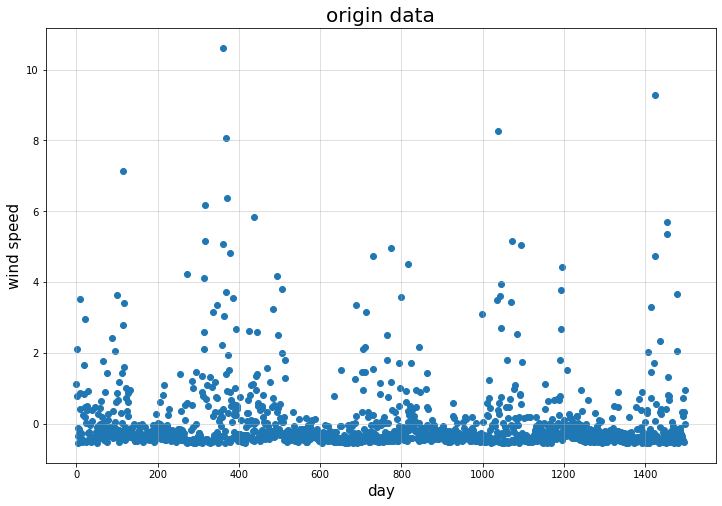

In [128]:
plot_origin(daily_wind,1,1500)

In [175]:
def myProphet(data,daystart,dayend,preday):
    global m,future,forecast
    data=data[daystart:dayend]
    daily_spd = data
    data3 = pd.DataFrame(daily_spd)
    data3.reset_index(inplace=True)
    data3.columns = ['ds','y']
#     m=Prophet(daily_seasonality=False)
    m=Prophet()
    m.fit(data3)
    future = m.make_future_dataframe(periods=preday)
    future=future.dropna()
    forecast=m.predict(future)
    m.plot(forecast,ylabel='Wind Production')
    plt.title('Forecasted Wind Production')
    print("Future Wind Production")
    forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Future Wind Production


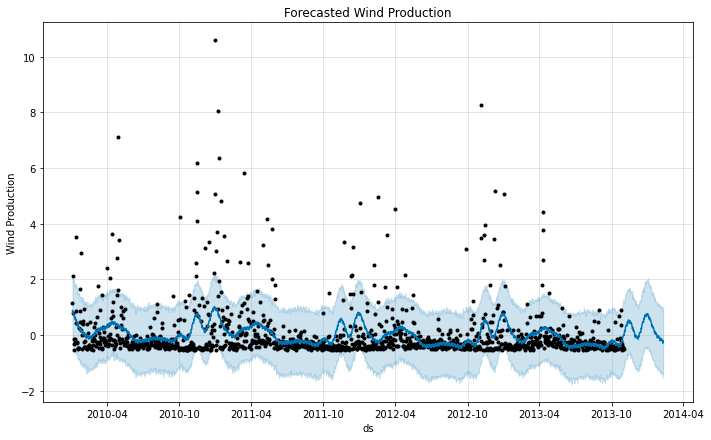

In [176]:
myProphet(daily_wind,1,1400,100)

In [177]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1494,2014-02-05,-0.079229,-1.356674,1.026773,-0.084642,-0.073253,-0.057348,-0.057348,-0.057348,0.046783,0.046783,0.046783,-0.104131,-0.104131,-0.104131,0.0,0.0,0.0,-0.136578
1495,2014-02-06,-0.079287,-1.369136,0.989800,-0.084811,-0.073243,-0.110379,-0.110379,-0.110379,0.006477,0.006477,0.006477,-0.116856,-0.116856,-0.116856,0.0,0.0,0.0,-0.189666
1496,2014-02-07,-0.079345,-1.353292,0.956296,-0.084934,-0.073164,-0.123563,-0.123563,-0.123563,0.005593,0.005593,0.005593,-0.129156,-0.129156,-0.129156,0.0,0.0,0.0,-0.202907
1497,2014-02-08,-0.079402,-1.518698,0.873851,-0.085183,-0.073149,-0.211589,-0.211589,-0.211589,-0.070715,-0.070715,-0.070715,-0.140874,-0.140874,-0.140874,0.0,0.0,0.0,-0.290991
1498,2014-02-09,-0.079460,-1.297121,1.001791,-0.085348,-0.073100,-0.122407,-0.122407,-0.122407,0.029427,0.029427,0.029427,-0.151834,-0.151834,-0.151834,0.0,0.0,0.0,-0.201867


In [178]:
def mycompare(data,res,daystart,dayend,preday):
    data=data[daystart:dayend+preday]
    data=data*Std+Mean
    forecast_yhat=res['yhat'][daystart:dayend+preday]
    forecast_yhat=forecast_yhat*Std+Mean
    plt.scatter([range(daystart,dayend)],data[daystart:dayend],label='origin data',color='pink')
    plt.scatter([range(dayend,dayend+preday-1)],data[dayend:dayend+preday],label='origin data',color='red')
    plt.plot(forecast_yhat,label='predict data',color='black')
    plt.grid(alpha=0.5)
    plt.legend(fontsize=15)
    plt.title('data compare',fontsize=20)
    plt.xlabel('hours',fontsize=15)
    plt.ylabel('wind speed',fontsize=15)

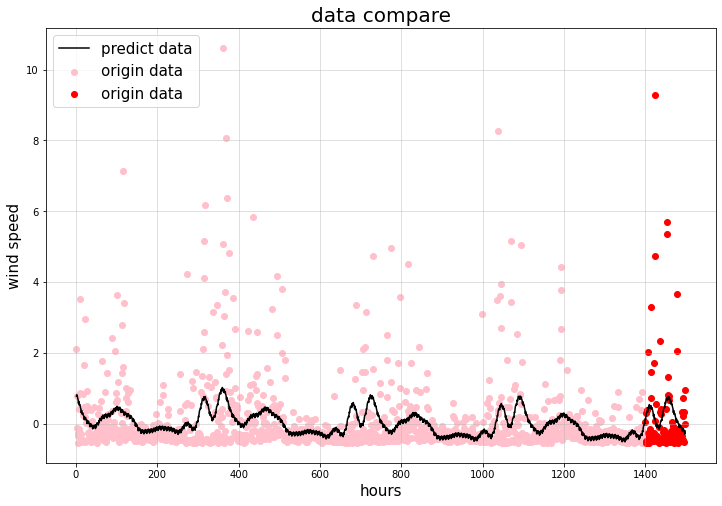

In [179]:
mycompare(daily_wind,forecast,1,1400,100)

In [148]:
daily_wind

,y
ds,
2010-01-02,0.023341
2010-01-03,1.137056
2010-01-04,2.109254
2010-01-05,0.798240
2010-01-06,-0.130100
...,...
2014-12-27,-0.353272
2014-12-28,-0.312897
2014-12-29,-0.384170


In [180]:
def ppp():
    plt.plot([[i] for i in range(99)],(forecast['yhat'][1400:]),color='r',label='predict line')
    plt.scatter([[i] for i in range(99)],daily_wind['y'][1400:1500-1],color='b',label='origin data')
    plt.xlabel('days',fontsize=15)
    plt.ylabel('windspd',fontsize=15)
    plt.title('data compare 2',fontsize=20)
    plt.legend(fontsize=15)
    plt.grid(alpha=0.5)

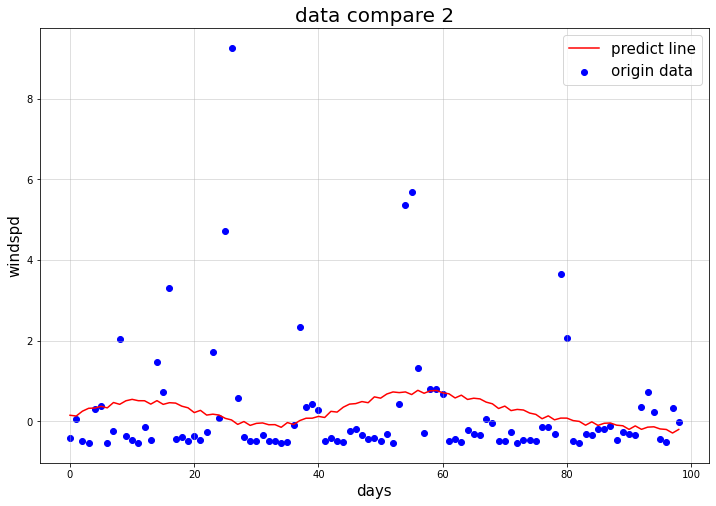

In [181]:
ppp()

In [187]:
error = []
for i in range(99):
    error.append(daily_wind['y'][1400+i]-forecast['yhat'][1400+i])
square_error = []
abs_error = []
for i in range(99):
    square_error.append(error[i]*error[i])
    abs_error.append(abs(error[i]))
RMSE = np.sqrt(sum(square_error))/len(square_error)
MAE = sum(abs_error)/len(abs_error)

In [190]:
RMSE

0.15169968872292522